# Introduction

Visual search is the common task of looking for something in a cluttered visual environment. The searched item is usually called the target, other non-target items are
called distractors. Many visual scenes contain more information than we can fully process all at once. This is the moment when the visual attention is essential. It is used to control the selection of the recognized objects. This selection could consist of objects, small groups of objects or even an array of locations. The selection periodicaly changes and usually consists of four to eight objects. 

The so called overt search refers to a series of eye movements around the scene made to bring the whole difficult-to-resolve item onto the fovea. On the other hand, if it is possible to identify the object during fixation the attention on a single point, the so called covert search happens (attentional shifts during a single fixation). Under dynamic real world conditions a new point of fixation is selected three to four times per second. However, under laboratory conditions, many search can be performed entirely with covert attention. 

The visual search experiment is a psychlological experiment used to analyze and study how the human visual search reacts on the specific stimuli in the visual scene. The experiment typicaly involves presenting a visual stimuli to a participant (picture, computer screen etc.). The stimuli typicaly contains number of objects. The participants are then asked to search for a specic target among the distractors (such as pink front slash as in our example). The researchers typicaly studied the effect of set size, target presence and homogeneity of the feature set on the accuracy and speed of the response.

# Experiment Description

During the experiment we studied how the reaction time and accuracy of the responses of the respondents differ under different visual stimuli. 

The experiment consists of 300 trials. In each trial the participants is shown an image containing a set of back and front slashes (`\` or `/`). The participants are instructed to search for the pink front slash symbol (`/`) and decide whether it is present in the image (press `F` button on keyboard) or absent (`J` button). The participants are encouraged to correctly respond as quickly as possible. They are provided with feedback on accuracy and whether their response was quick enough. The trials are divided into 16 variants each with 20 members. The variants are randomly distributed through the dataset. Each variant is specified by three conditions. The first condition is whether the target is present (`target` column in the  pre-processed dataset). The second is number of objects in the image (`size` column), possible sizes are 10, 20, 30 and 40 objects. The last condition is search type (`conjuction` column) with values `False` (feature search), image contains only pink symbols, or `False` (conjunction), image contains both pink and blue symbols in both orientations. The estimated experiment duration is approximately 15-20 minutes.

We recruited $N=3$ participants for the study. All the participants consisted of university male students in age range 22-23 years. The participants were seated in from of the notebook with 15.6 inch display with resolution 1920x1080 in a calm room. Then they were instructed to make themselves comfortable and turn off the notifications of their mobile phones. Afterwards, they were instructed about the experiment and performed the experiment. None of the participants did not need train trials or break. Participants were fully concentrated during the whole experiment, so we decided persist all the data.

The code blocks below sets up the environment for the work, defines functions for parsing the data from the original `.csv` files and loads the whole dataset.

In [277]:
# Import all the necessary libraries
from pathlib import Path
from typing import Union

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [278]:
%matplotlib inline
# should enable plotting without explicit call .show()

# For html page generation.
%load_ext pretty_jupyter

The pretty_jupyter extension is already loaded. To reload it, use:
  %reload_ext pretty_jupyter


In [279]:
def parse_data(data_path: Union[str, Path]) -> pd.DataFrame:
    """
    Parses the data from the given participant, sets new column with participant 
    ID and extracts only the necessary data from the dataset.
    """
    
    # Get participant ID
    participant = data_path.stem.split("_")[1]
    
    # Read the load the csv file.
    df = pd.read_csv(data_path)
    
    # Get only rows with the response data.
    df = df[df.trial_type == "canvas-keyboard-response"]
    
    # Rename the columns for the future usage.
    df = df.rename(
            {
                "rt": "response_time",
                "trial_index": "trial",
                "present": "target_present",
                "setSize": "size",
                "conjuction": "conjuction",
                "correct": "correct",
            },
            axis = 1
        )
    
    # Get only usefull columns.
    df = df\
        [
            [
                "response_time",
                "trial",
                "target_present",
                "size",
                "conjuction",
                "correct",
            ]
        ]
    
    # Add participant ID to data.
    orig_cols = df.columns.to_list()
    new_cols = {
        "participant": participant,
    }
    df = df.assign(**new_cols)
    df = df[["participant"] + orig_cols]

    # Define parameters types.
    df.astype(
        {
            "participant": str,
            "response_time": int,
            "trial": int,
            "target_present": bool,
            "size": int,
            "conjuction": bool,
            "correct": bool,
        }
    )

    return df.sort_values(by="trial")

In [280]:
def load_data(
        data_dir="data",
    ):
    
    """
    Loads the data from all the participants stored in the shared directory 
    in `.csv` files with filenames `ex_{participant_number}.csv`.
    """
    
    selected_files = (Path.cwd() / data_dir).glob("*.csv")

    return pd.concat((parse_data(f) for f in selected_files))

In [281]:
# Load the data from the participants:
exp_data = load_data()

In [282]:
# Show the first lines of the loaded dataset.
exp_data.head()

,participant,response_time,trial,target_present,size,conjuction,correct
1,1,4872.0,1,False,30.0,False,True
3,1,1260.0,3,False,20.0,True,True
5,1,734.0,5,True,40.0,False,True
7,1,2710.0,7,False,30.0,True,True
9,1,845.0,9,True,10.0,True,True


# Results

First, we compute the accuracy of the respondents. Based on the results we can say that the accuracies of the participants were quite different. This fact might be caused by different level of concentration of the respondents or different strategies, how to solve the problem (some respondents might be faster, but less accurate than others). We should consider this fact in the future analyses, because it may have significant infuence in the other results. 

The code and results of the computation of the accuracies can be found below in the following code blocks.  

In [283]:
# Compute the accuracy of the participants.
accuracy_data = exp_data.groupby("participant")\
    .agg(accuracy=("correct", 'mean'))\
    .round(decimals=3)\
    .reset_index()

In [284]:
# Print the table of accuracies for the participants.
accuracy_data

,participant,accuracy
0,1,0.925
1,2,0.997
2,3,0.969


For the subsequent analyses, we remove the error trials.

In [285]:
# Get only trials with correct response.
correct_results = exp_data[exp_data.correct]

In [286]:
# Show first items of the dataset without erroneous trials.
correct_results.head()

,participant,response_time,trial,target_present,size,conjuction,correct
1,1,4872.0,1,False,30.0,False,True
3,1,1260.0,3,False,20.0,True,True
5,1,734.0,5,True,40.0,False,True
7,1,2710.0,7,False,30.0,True,True
9,1,845.0,9,True,10.0,True,True


As the next step of the analysis we plot the distributions of the reaction times by set size, participant and eventually by the search type (`conjunction` or `feature` search).

In [287]:
def plot_reaction_times(
        data: pd.DataFrame,
        title_str: str="Reaction times of participants by set size",
        x_size=None, # To have the x axis in the same scale for the subsets.
    ):
    """
    Plots reaction times for all participants and number of objects in the picture.
    
    Arguments:
        `data`: Selected data.
        `title_str`: Title of the plot.
        `x_size`: Upper bound of the x axis (`None` - default). Used to maintain the same scale for subsets.
    """
    
    # Sort the data by `participant` and `size` to be in correct order for ploting.
    hlp = data.copy().sort_values(by=["participant", "size"])

    hlp["size"] = hlp["size"].astype(str)

    g = sns.catplot(
        data=hlp, 
        x="response_time",
        y="size",
        hue='participant',
        kind='box',
        aspect=2,
    )
    
    g.ax.xaxis.grid(True)
    g.set_xlabels("Reaction time (ms)")
    g.set_ylabels("Set size")
    g.set(title=title_str);
    
    # If specified -> set right `xlim`.
    if x_size != None:
        g.set(xlim=(0, x_size))

First, we look at the distribution of the response time for the whole dataset. We can see that both the mean reaction time ant its variance grew with set size in the most cases for the all participants. From these results we can see that the response time of the participant `3` is mostly shorther than for the other participants.

The distributions mentioned in this paragraph can be seen below.

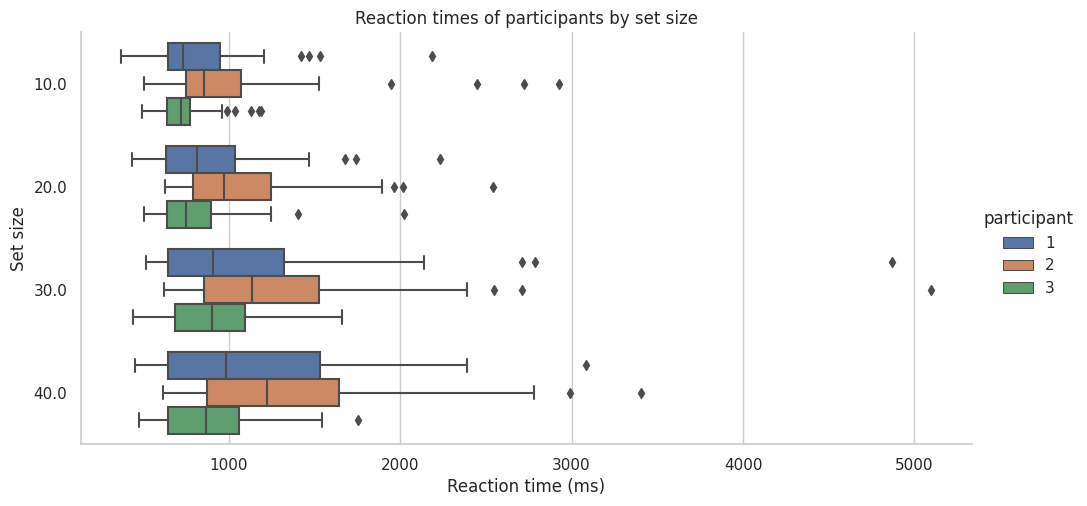

In [288]:
# Plot reaction times for the whole data.
plot_reaction_times(correct_results)

For the deeper understanding of the reaction times we also display the distribution for only `conjunction` search and `feature` search. There, we can see the significant difference in mean response time between the different search type with higher mean response time for `conjunction` task in the majority of results. 

In the `feature` search we can see the interesting phenomenom for the respondent `1`. The respondent's response time almost was not affected by the set size. Furthermore, it was excessively fast in comparison to other respondents. This phenomenon could be the result of the relatively small accuracy of the respondent `1`. The respondent might try to answer as faster as he can which may lead to worse accuracy. He may be, for example, over motivated by the application feedback. On the other hand reaction times for the participant `2` are in the most cases the highest, but he also have the highest accuracy, which may be the indicator of the different strategies how to approach the task.

It is also noteworthy that the participant `3` seemingly was not affected by the search type task as he performed almost the same in the `conjunction` and `feature` search tasks.

The distributions mentioned in this part of the text could be found in the following code blocks.

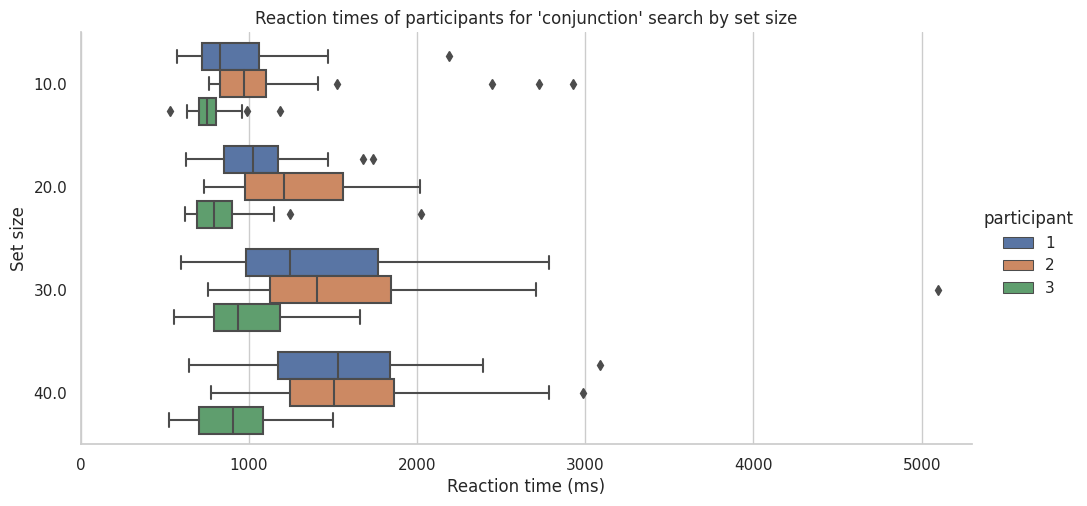

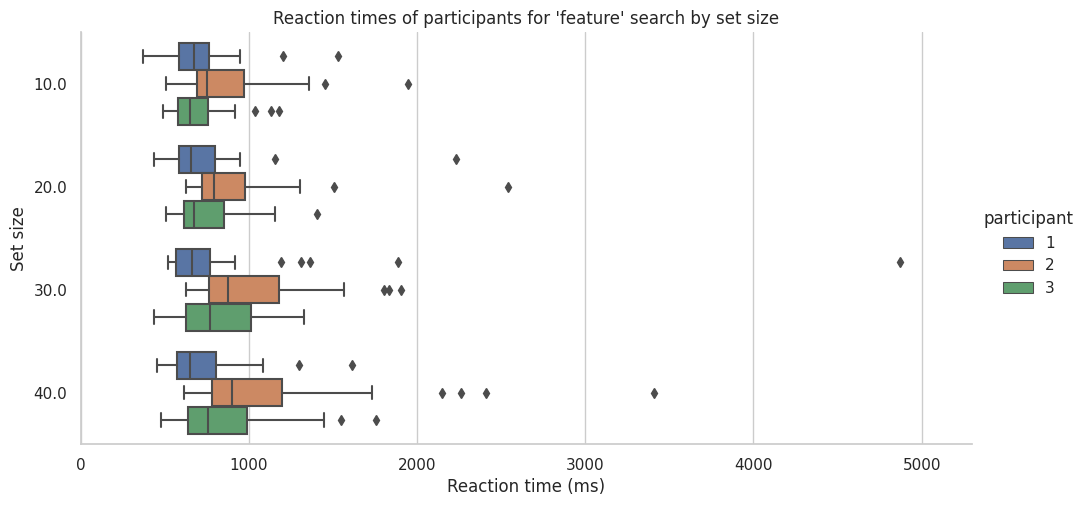

In [289]:
# Plot reaction times for only `conjunction` and `feature` search.
cf_task = lambda x: 'conjunction' if x else 'feature'

for is_conjuction in [True, False]:
    plot_reaction_times(
            correct_results[correct_results['conjuction'] == is_conjuction],
            title_str=f"Reaction times of participants for '{cf_task(is_conjuction)}' search by set size",
            x_size=correct_results["response_time"].max() + 200,
        )

Next, we will focus more on the relation of the reaction time and set size. We compute the regression slopes for set size and reaction time. We report the slope and its 95% confidence interval for both feature and conjunction search and for trials with target and without the target.

It is noteworthy that the slope is significantly smaller for the `feature` search in comparison to `conjunction` search for almost all participants. The only exemption is the participant `3`, whose performance was almost identical in both task types.

In case of the target presence we can see significantly smaller slopes for the trials with the target than for the non-target trials for the all participants.

The code for the computation of the regresion slope and results are shown in the code blocks below.

In [290]:
def perform_regresion(
        data: pd.DataFrame,
        conf_interval=.05,
    ):
    """
    Computes the regresion slope.
    
    Returns: regresion_slope, lower_confidence_interval, upper_confidence_interval 
    """
    
    sizes = data['size']
    response_times = data['response_time']
    
    # Regresion slope calculation.
    model = sm.OLS(response_times, sm.add_constant(sizes)).fit()

    # Confidence interval calculation.
    cfi = model.conf_int(alpha=conf_interval)
    
    return model.params[1], cfi[0][1], cfi[1][1]

In [291]:
participants = correct_results.participant.unique()


# Result structure for different search type data. 
regresion_results_conj = pd.DataFrame(
    columns=[
            "participant",
            "conjunction",
            "size_slope",
            "conf_int_lower",
            "conf_int_upper",
        ]
    )

for participant in participants:
    for is_conjunction in [True, False]:
        subset = correct_results[
                (correct_results.participant == participant) &
                (correct_results.conjuction == is_conjunction)
            ]
        
        reg_slope, conf_low, conf_up = perform_regresion(subset)
        tmp = pd.DataFrame(
                [
                    [
                        participant,
                        # Convert the `bool` variables to `int` to get rid of warning.
                        int(is_conjunction),
                        reg_slope,
                        conf_low,
                        conf_up,
                    ]
                ], 
                columns=regresion_results_conj.columns
            )

        regresion_results_conj = pd.concat([regresion_results_conj, tmp], ignore_index=True)

In [292]:
participants = correct_results.participant.unique()



# Result structure for different target presence data.
regresion_results_target = pd.DataFrame(
    columns=[
            "participant",
            "target_present",
            "size_slope",
            "conf_int_lower",
            "conf_int_upper",
        ]
    )

# Iterate through all participants.
for participant in participants:
    for is_target_present in [True, False]:
        subset = correct_results[
                (correct_results.participant == participant) &
                (correct_results.target_present == is_target_present)
            ]
        
        reg_slope, conf_low, conf_up = perform_regresion(subset)
        tmp = pd.DataFrame(
                [
                    [
                        participant,
                        # Convert the `bool` variables to `int` to get rid of warning.
                        int(is_target_present),
                        reg_slope,
                        conf_low,
                        conf_up,
                    ]
                ], 
                columns=regresion_results_target.columns
            )
        
        regresion_results_target = pd.concat([regresion_results_target, tmp], ignore_index=True)
        

In [293]:
# Return proper variables back to `bool`.
regresion_results_conj["conjunction"] = regresion_results_conj["conjunction"].astype(bool)
regresion_results_target["target_present"] = regresion_results_target["target_present"].astype(bool)

In [294]:
# Show regresion slopes for the `conjunction` and `feature` search.
regresion_results_conj

,participant,conjunction,size_slope,conf_int_lower,conf_int_upper
0,1,True,22.918066,16.653456,29.182675
1,1,False,1.547780,-4.378091,7.473651
2,2,True,18.272384,10.473917,26.070850
3,2,False,8.779500,3.190746,14.368254
4,3,True,5.402767,1.964250,8.841283
5,3,False,5.197962,1.829003,8.566921


In [295]:
# Show regresion results for the target present or missing.
regresion_results_target

,participant,target_present,size_slope,conf_int_lower,conf_int_upper
0,1,True,6.851811,1.138925,12.564696
1,1,False,16.335790,8.297342,24.374238
2,2,True,5.215431,-1.463896,11.894758
3,2,False,21.750750,13.966373,29.535127
4,3,True,0.249232,-2.619145,3.117609
5,3,False,10.000655,6.654490,13.346819


For better undestanding of the results we also plot the regresion slopes with the confidence intervals 95% in the following part.

In [296]:
def plot_size_slope(
        data: pd.DataFrame,
        hue_param: str,
    ):
    
    is_conj_labels = {
            True: "conjunction",
            False: "feature",
        }
    
    is_target_labels = {
            True: "present",
            False: "not present",
        }
    
    select_legend = lambda x: is_conj_labels if x == "conjunction" else is_target_labels

    title_label = {
            "conjunction": "for different search types",
            "target_present": "based on the target presence",
        }
    
    legend_title = {
        "conjunction": "Search type",
        "target_present": "Target present",
    }
    
    # Create labels for the plots.
    hlp = data.copy()
    hlp[hue_param] = hlp[hue_param].map(select_legend(hue_param)).astype(str)

    # Rename the trials to "{trial_number} : {task_type}" (for plotting).
    # hlp["trial"] = after["trial"] + " : " + after["task_type"]

    g = sns.pointplot(
            data=hlp, 
            x="participant", 
            y="size_slope", 
            hue=hue_param,
            join=False,
            dodge=0.1,
        )
    
    # Set title and axes labels.
    g.set(
        xlabel='Participant',
        ylabel='Slope',
        title=f"Regresion slopes and its confidence intervals \n{title_label[hue_param]}"
    )
    
    g.legend(title=legend_title[hue_param])
    
    # Get positions of the points to draw the confident intervals.
    x_coords = []
    y_coords = []
    for point_pair in g.collections:
        for x, y in point_pair.get_offsets():
            x_coords.append(x)
            y_coords.append(y)

    # Calculate the confidence intervals as bar size.
    confidence_intervals = [
            [data.size_slope.mean()-data.conf_int_lower.min()],
            [data.conf_int_upper.max()-data.size_slope.mean()]
        ]

    # Add confidence interval as lines into the plot.
    g.errorbar(x_coords, y_coords, 
        yerr=errors,
        ecolor='black',
        fmt=' ',
        zorder=-1
    )

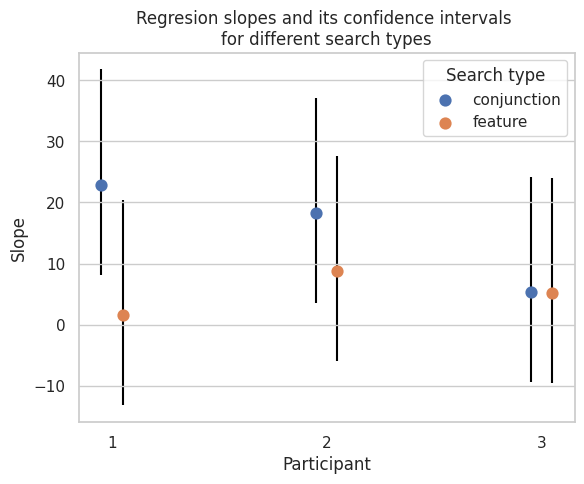

In [297]:
plot_size_slope(regresion_results_conj, "conjunction")

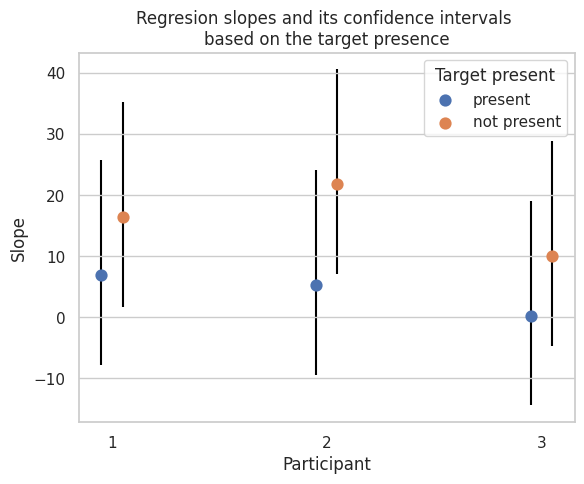

In [298]:
plot_size_slope(regresion_results_target, "target_present")

# Conclusion

Based on the results we can see that the `conjunction` task is in the most cases somehow harder search task than the `feature` task. We address this to more complex stimuli which the respondent has to process. Because there are different both color and orientation stimuli. This idea is supported by the average response times that are higher for the `conjunction` and also by the regression slopes that are also higher. The exceedingly high regresion slopes for the `conjuction` search means that the task is significantly more difficult with the increasing set size. On the other hand, in the `feature` search the set size is not as much important.

When comparing the regresion slopes for target absent trials and trials containg targets, we may say that the difficulty of the target absent trials raises much faster in case of the needed response time. We address this to the need of checking all the objects in the picture in target absent trial. In contrast, in trials containing the target it is only necessary to check objects until we find the target object, which can last much shorther time interval. 